In [20]:
import pandas as pd
data = {
    "x": ["a,b,d,c", "a,c,d", "a"],
}
df = pd.DataFrame(data)
print(df)
df[["a", "b", "c", "d"]] = df.x.str.split(",", expand=True)
print(df)

         x
0  a,b,d,c
1    a,c,d
2        a
         x  a     b     c     d
0  a,b,d,c  a     b     d     c
1    a,c,d  a     c     d  None
2        a  a  None  None  None


In [21]:
data = {
    "x": ["a,b,d", "a,c,d", "a"],
}
df = pd.DataFrame(data)
print(df)
df["a"] = df.x.str.split(",").str[0]
df[ "b"] = df.x.str.split(",").str[1]
df["c"] = df.x.str.split(",").str[2]
df["d"] = df.x.str.split(",").str[3]
print(df)

       x
0  a,b,d
1  a,c,d
2      a
       x  a    b    c   d
0  a,b,d  a    b    d NaN
1  a,c,d  a    c    d NaN
2      a  a  NaN  NaN NaN


In [22]:
import seaborn as sns
df = sns.load_dataset("iris")

In [23]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [24]:
df.groupby("species").agg({"sepal_length":"describe"})

sepal_length                                            
                  count   mean       std  min    25%  50%  75%  max
species                                                            
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

In [25]:
import matplotlib.pyplot as plt

In [38]:
s = df.groupby(["sepal_length", "species"]).size().unstack()

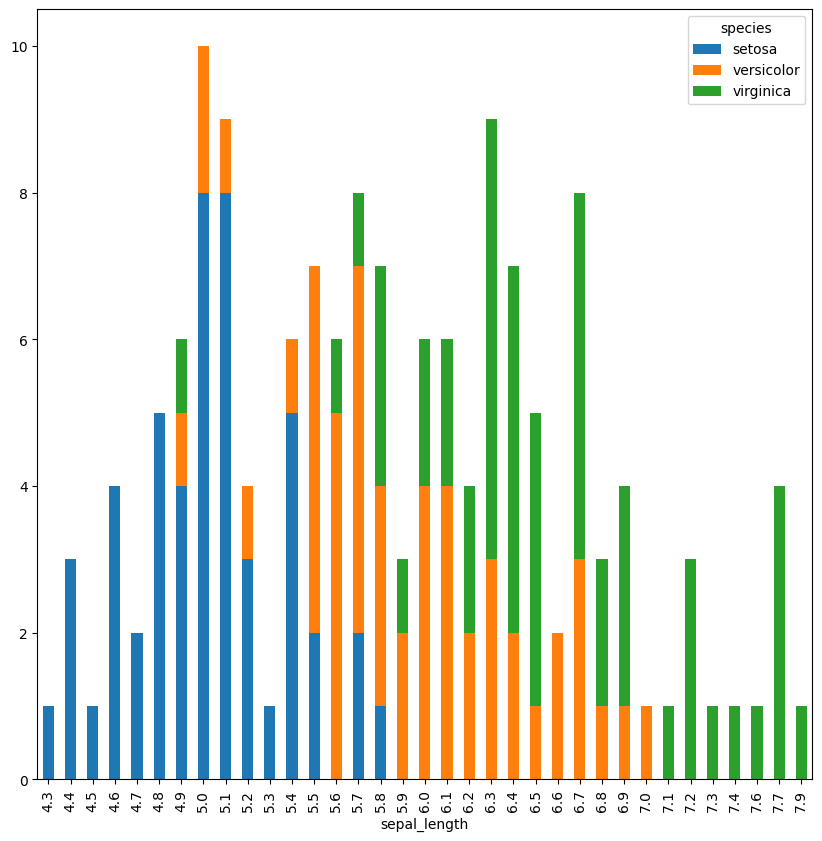

In [46]:
ax = s.plot(kind="bar", stacked=True, figsize=(10,10))

<Axes: xlabel='sepal_length', ylabel='petal_length'>

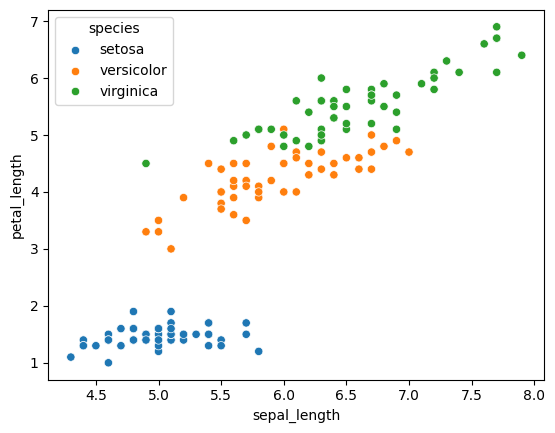

In [28]:
sns.scatterplot(data=df,x="sepal_length", y="petal_length", hue="species")

In [53]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(df[["species"]])


<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [66]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the "species" column of the DataFrame
encoded_species = encoder.fit(df[["species"]])
encoded_species.fit_transform(df[["species"]])

<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [62]:
encoded_species[0]

<1x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [63]:
le = LabelEncoder()
le.fit_transform(df["species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
 import numpy as np
>>> from sklearn.impute import KNNImputer
>>> X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
>>> imputer = KNNImputer(n_neighbors=2)
>>> imputer.fit_transform(X)


array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])